In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
premier = pd.read_csv('premier.csv')

In [16]:
premier = premier.drop(axis=1, columns='Unnamed: 2')

In [21]:
earned = premier.iloc[:-2, :2]
lost = premier.iloc[:, 2:]
lost = lost.dropna(subset=['Lost Premier', 'Lost Season'], how='all')

In [27]:
going_to_lose = earned[earned['Earned Season']=='2023 Season']

In [22]:
lost

,Lost Premier,Lost Season
1,Alex Cook,2022 Season
2,Alex Goates,2022 Season
3,Alli Jenki,2022 Season
4,Andrew Card,2022 Season
5,Andrew Scharf,2022 Season
...,...,...
88,Tripp Pierson,2022 Season
89,Ty Parillo,2022 Season
90,Tyler Stokes,2022 Season
91,Will Foote,2022 Season


In [29]:
lost_premier = set(lost['Lost Premier'].str.lower())
has_premier = set(earned[earned['Earned Season']=='2024 Season']['Earned Premier'].str.lower())
will_lose_premier = set(going_to_lose['Earned Premier'].str.lower())

In [30]:
df = pd.read_csv('points_ratings.csv')

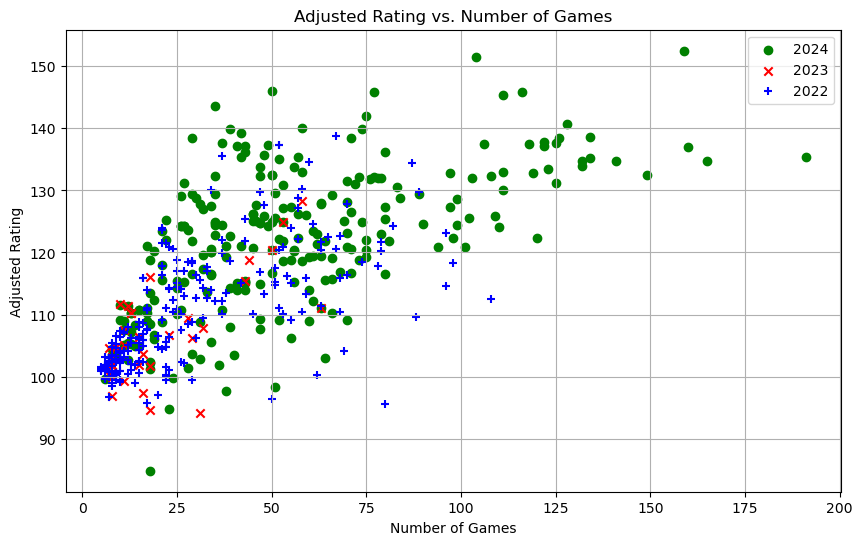

In [32]:
earned_premier_df = df[df['Name'].isin(has_premier)]
lost_premier_df = df[df['Name'].isin(lost_premier)]
will_lose_premier_df = df[df['Name'].isin(will_lose_premier)]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting for players who earned premier
plt.scatter(earned_premier_df['Games'], earned_premier_df['Adjusted Rating'], c='green', label='2024', marker='o')

# Plotting for players who lost premier
plt.scatter(lost_premier_df['Games'], lost_premier_df['Adjusted Rating'], c='red', label='2022', marker='x')

plt.scatter(will_lose_premier_df['Games'], will_lose_premier_df['Adjusted Rating'], c='blue', label='2023', marker='+')

plt.title('Adjusted Rating vs. Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Adjusted Rating')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
earned_premier_df[earned_premier_df['Adjusted Rating'] < 100]

,Unnamed: 0,Name,Rating,Adjusted Rating,Games
1257,182,louis jouve,99.786225,99.844527,24
1307,2279,noel svensson,95.790598,99.579060,6
1577,1361,bransen eppes,98.382958,98.382958,51
1723,6,marcus gauterin,97.488760,97.614322,38
2092,1104,kannon forbush,92.828542,94.845515,23
2344,1042,jack dumouchel,71.325138,84.819191,18
